## Basic analysis of headlines #1

In this task we are going to use the Paraphraser dataset to do basic text analysis operations on news headlines.
The dataset is a large .json file.



### Getting the dataset

In [25]:
from os import remove
from shutil import copyfileobj
import zipfile

def download_file(url):
    compressed_dataset = 'Headlines.zip'
    with requests.get(url, stream=True) as r:
        with open(compressed_dataset, 'wb') as f:
            shutil.copyfileobj(r.raw, f)
            
    archive = zipfile.ZipFile(compressed_dataset)
    for file in archive.namelist():
        if file.endswith('.json'):
            archive.extract(file)
            archive.close() # close file
            os.remove(compressed_dataset) 
    return file

In [26]:
download_file('http://paraphraser.ru/download/get?file_id=7')

'ParaPhraserPlus/ParaPhraserPlus.json'

### Getting familiar with data

In [3]:
import json
with open("ParaPhraserPlus/ParaPhraserPlus.json") as data_set:
    HEADLINE_SET = json.load(data_set)

In [31]:
HEADLINE_SET['0'].keys()

dict_keys(['rubric', 'date', 'headlines'])

In [32]:
list(HEADLINE_SET.items())[0]

('0',
 {'rubric': 'общество',
  'date': '2019/01/02',
  'headlines': ['Птичий праздник: Что такое "куриное рождество" и кто его отмечает',
   'Куриное Рождество в 2019 году: что это за праздник и как стать его главным героем']})

In [27]:
list(HEADLINE_SET.items())[0][1]['headlines']

['Птичий праздник: Что такое "куриное рождество" и кто его отмечает',
 'Куриное Рождество в 2019 году: что это за праздник и как стать его главным героем']

In [38]:
len(HEADLINE_SET)

1725393

### Starting the stage of analysis

In [187]:
import json
import nltk, razdel
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
import numpy as np

# Download nltk packages used in this example
nltk.download('stopwords')
nltk.download('punkt')

# Customize list of stopwords as needed. Here, we add common
# punctuation and contraction artifacts.

stop_words = stopwords.words('russian') + [
    '.',
    ',',
    '--',
    '\'s',
    '?',
    ')',
    '(',
    ':',
    '\'',
    '\'re',
    '"',
    '-',
    '}',
    '{',
    u'—',
    ]

[nltk_data] Downloading package stopwords to /home/aliak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/aliak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [121]:
#Create lemmatizer and stopwords list
mystem = Mystem()
#Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stop_words\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return set([word for word in text.split(' ')])

In [200]:
for i in range(3):
    rubric, headlines = list(HEADLINE_SET.items())[i][1]['rubric'], list(HEADLINE_SET.items())[i][1]['headlines']
    for single_headline in headlines:
        sentences += [_.text for _ in razdel.sentenize(single_headline)]
        words += [w.text.lower() for sentence in sentences for w in
                 razdel.tokenize(sentence)]

        fdist = nltk.FreqDist(w for w in words if w[0] not in stop_words)
        
        # Basic stats
        num_words = sum([i for i in fdist.values()])
        num_unique_words = len(fdist.items())
        
        average_word_length = round(sum(len(word) for word in words) / len(words), 2)
        mean_word_length =  np.mean(np.array([len(word) for word in words]))
        max_word_length = np.max(np.array([len(word) for word in words]))
        average_sentence_length = round(len(words) / len(sentences), 2)
        
        # Hapaxes are words that appear only once
        num_hapaxes = len(fdist.hapaxes())

        top_10_words = fdist.most_common(10)
        
    print("---------------------Article {%d}-----------------------" % i)
    print(rubric)
    print('\tMaximum word length of headlines(in-article):'.ljust(25), max_word_length)
    print('\tAverage length of a word (letterwise):'.ljust(25), average_word_length)
    print('\tMedian length of a word (wordwise):'.ljust(25), mean_word_length)
    print('\tAverage length of a sentence (wordwise):'.ljust(25), average_sentence_length)
    print('\tNum Sentences:'.ljust(25), len(sentences))
    print('\tNum Words:'.ljust(25), num_words)
    print('\tNum Unique Words:'.ljust(25), num_unique_words)
    print('\tNum Hapaxes:'.ljust(25), num_hapaxes)
    print('\tTop 10 Most Frequent Words (stop words):\n\t\t', \
            '\n\t\t'.join(['%s (%s)'
            % (w[0], w[1]) for w in top_10_words]))
    print("------------------------------------------------------")
#     print("-------------------Lemmatized text--------------------")
#     print("------------------------------------------------------")
#     print(preprocess_text(' '.join(sentences)))
#     print("------------------------------------------------------")
    sentences.clear()
    words.clear()

---------------------Article {0}-----------------------
общество
	Maximum word length of headlines(in-article): 9
	Average length of a word (letterwise): 4.26
	Median length of a word (wordwise): 4.261904761904762
	Average length of a sentence (wordwise): 21.0
	Num Sentences:           2
	Num Words:               22
	Num Unique Words:        12
	Num Hapaxes:             6
	Top 10 Most Frequent Words (stop words):
		 праздник (3)
		что (3)
		рождество (3)
		его (3)
		птичий (2)
		такое (2)
		2019 (1)
		году (1)
		это (1)
		за (1)
------------------------------------------------------
---------------------Article {1}-----------------------
общество
	Maximum word length of headlines(in-article): 11
	Average length of a word (letterwise): 4.67
	Median length of a word (wordwise): 4.671052631578948
	Average length of a sentence (wordwise): 25.33
	Num Sentences:           3
	Num Words:               28
	Num Unique Words:        8
	Num Hapaxes:             0
	Top 10 Most Frequent Words (stop 

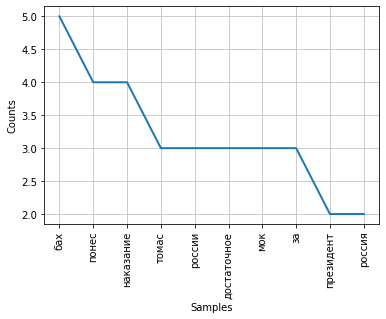

In [201]:
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

### Comment on what are hapaxes, the difference between uniquewords and hapaxes

In [153]:
fdist.hapaxes()

['глава', 'заявил', 'что', 'манипуляции', 'пробами', 'на']

In [213]:
list(fdist.items())

[('томас', 3),
 ('бах', 5),
 ('россии', 3),
 ('понес', 4),
 ('достаточное', 3),
 ('наказание', 4),
 ('президент', 2),
 ('мок', 3),
 ('россия', 2),
 ('достаточно', 2),
 ('наказана', 2),
 ('за', 3),
 ('допинг', 2),
 ('глава', 1),
 ('заявил', 1),
 ('что', 1),
 ('манипуляции', 1),
 ('пробами', 1),
 ('на', 1)]

In [79]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

In [16]:
from ipymarkup import show_span_box_markup, show_dep_markup

In [12]:
text = 'В мероприятии примут участие не только российские учёные, но и зарубежные исследователи, в том числе, Крис Хелмбрехт - управляющий директор и совладелец креативного агентства Kollektiv (Германия, США), Ннека Угбома - руководитель проекта Mushroom works (Великобритания), Гергей Ковач - политик и лидер субкультурной партии «Dog with two tails» (Венгрия), Георг Жено - немецкий режиссёр, один из создателей экспериментального театра «Театр.doc», Театра им. Йозефа Бойса (Германия).'

In [13]:
spans = [(102, 116, 'PER'), (186, 194, 'LOC'), (196, 199, 'LOC'), (202, 214, 'PER'), (254, 268, 'LOC'), (271, 283, 'PER'), (324, 342, 'ORG'), (345, 352, 'LOC'), (355, 365, 'PER'), (445, 455, 'ORG'), (456, 468, 'PER'), (470, 478, 'LOC')]

In [14]:
show_span_box_markup(text, spans)

In [17]:
words = ['В', 'советский', 'период', 'времени', 'число', 'ИТ', '-', 'специалистов', 'в', 'Армении', 'составляло', 'около', 'десяти', 'тысяч', '.']
deps = [(2, 0, 'case'), (2, 1, 'amod'), (10, 2, 'obl'), (2, 3, 'nmod'), (10, 4, 'obj'), (7, 5, 'compound'), (5, 6, 'punct'), (4, 7, 'nmod'), (9, 8, 'case'), (4, 9, 'nmod'), (13, 11, 'case'), (13, 12, 'nummod'), (10, 13, 'nsubj'), (10, 14, 'punct')]
show_dep_markup(words, deps)

We can see that information like article-id is not neccary for our main goal, becuase it does not carry linguistic information. Besides that, the headlines are from different categories and it might be a better idea to perform topic-based separation as clusters, so that the connection between the category and its headlines gets more clear, and the data size, gets smaller. therefore easier to manipulate.

In [46]:
items = HEADLINE_SET.items()
for i in list(items):
    
    if i[1] = 'общество':
        fname = "{}.json".format(i[1])
        
    if i[1] = 'спорт':
        fname = "общество.json"
    if i[1] = 'общество':
        
        fname = "общество.json"
        
    with open(fname, 'w') as f:
        json.dump({list(items): [i]}, f)

{'rubric': 'общество',
 'date': '2019/01/02',
 'headlines': ['В Индии 5 млн женщин выстроились стеной в 620 км ради равенства (Фото)',
  'Индийские женщины выстроили живую стену длиной 620 километров, требуя равенства',
  'В Индии женщины встали живой стеной длиной 620 км']}